In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Data Reading and Understanding 

In [3]:
# Read and view the Dataset
df= pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Check about shape of Data
df.shape

(730, 16)

In [5]:
# check about type of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#check null values 

df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

## EDA

## Observations:
- We don't require 'dtday' because we can use other columns like: yr, mnth, weekday, workingday and holiday.
- We don't require 'instant' column,it will not useful for EDA and just a serial number of the dataset.

In [11]:
# Drop unnecessary columns

df.drop(['instant','dteday'],axis=1,inplace=True)

In [12]:
#verify dataframe shape 
df.shape

(730, 14)

In [13]:
#verify data frame header 
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:

#Change all levels data to catogoril data and replace value which can help in crate dummy variables.

df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)
df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
df.weathersit.replace({1:'clear',2:'mist',3:'light_rain',4:'heavy_rain'},inplace = True)


In [15]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
#columns such as 'temp','atemp','hum','casual','registered','windspeed','cnt'are integers and it is expected them to be as integers only.
#column 'cnt' is the Target variable.
    
#Create numeric column array
num_cols = ['temp','atemp','hum','casual','registered','windspeed','cnt']

## Data Visualization


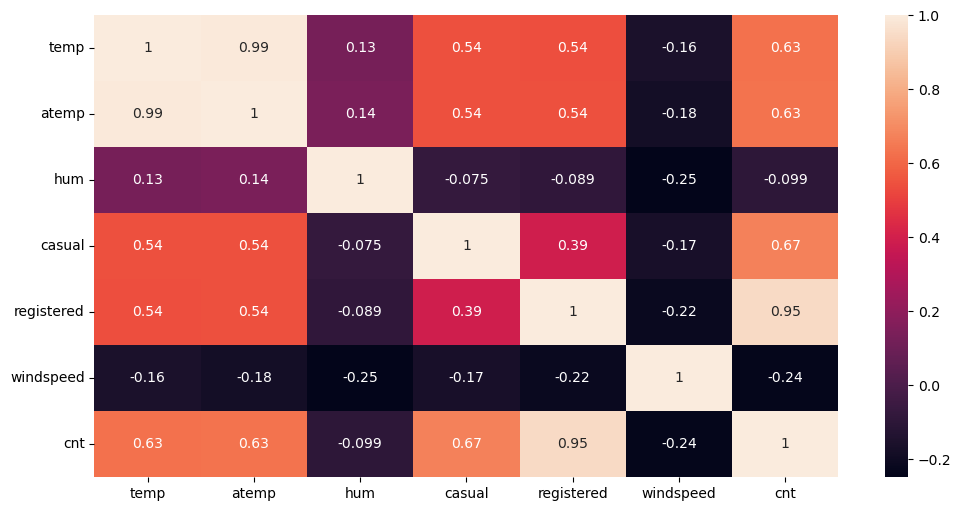

In [18]:
# Plot Heatmap
plt.figure(figsize = (12,6))
sns.heatmap(df[num_cols].corr(),annot =True)
plt.show()


<Figure size 1500x3000 with 0 Axes>

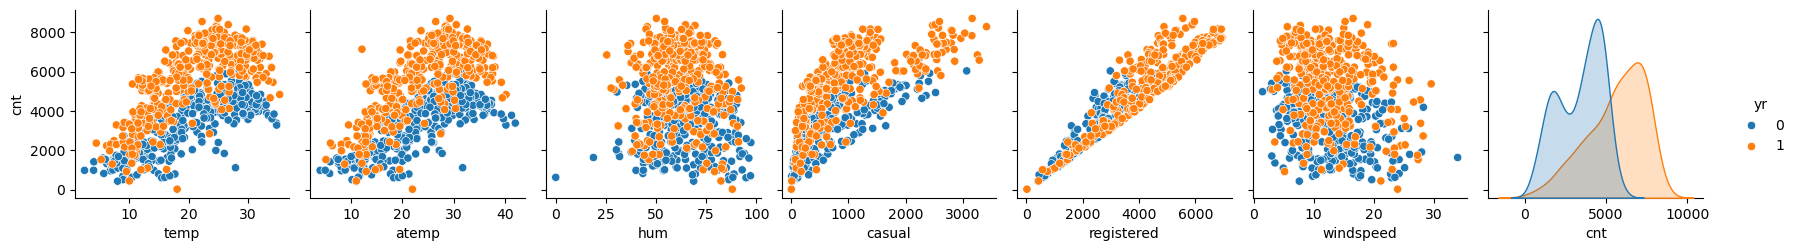

In [19]:
# Visualization of Relationship of Numerical Features
plt.figure(figsize = (15,30))
sns.pairplot(data=df,x_vars=num_cols,y_vars=['cnt'],hue ='yr')
plt.show()

## observations:

- Temp and atemp are very strongly correlated one can be dropped.
- Humidity not much Negative effect on the Target Variable.
- Registered Bike users are strongly correlated with Target Variable and more than Casual.
- We can remove casual and registered becuase we already taken 'cnt' as a target variable.

In [21]:
df=df.drop(['casual','registered'],axis =1)

In [22]:
df.shape

(730, 12)

In [23]:
#remove 'casual' and'registered' from numeric column array
num_cols = ['temp','atemp','hum','windspeed','cnt']

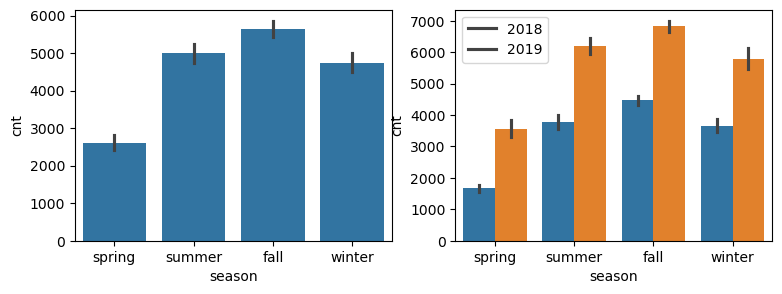

In [24]:

plt.figure(figsize = (9,3))
plt.subplot(1,2,1)
sns.barplot(x='season',y='cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x='season',y='cnt',data=df, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()


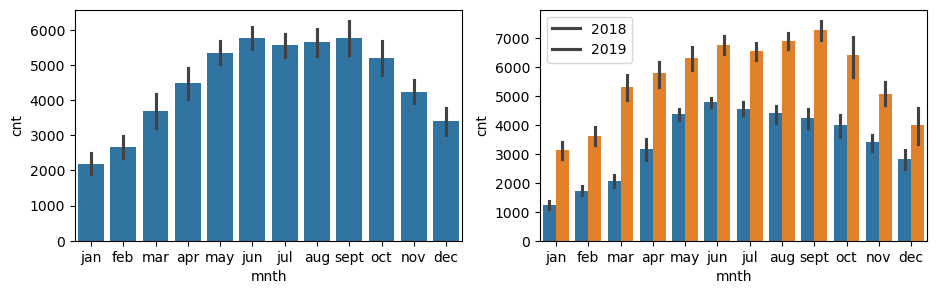

In [25]:
plt.figure(figsize = (11,3))
plt.subplot(1,2,1)
sns.barplot(x='mnth',y='cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x='mnth',y='cnt',data=df, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

## Observation
- Most number of the Bike has been rented in the Year 2019 in the Month of September However in the just previous Year it was in the June Month.
- Basically in the Winter Season BOOM Bikes can expect more number demand for Rent of Bikes.

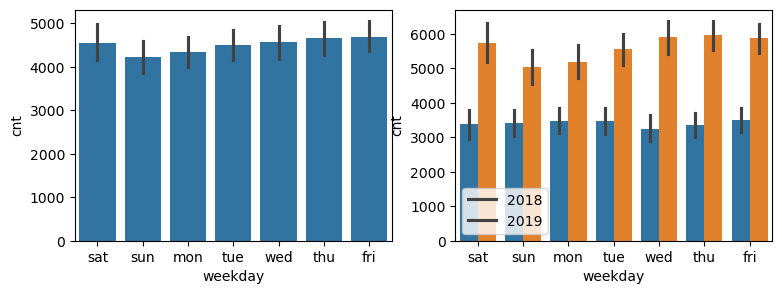

In [27]:
plt.figure(figsize = (9,3))
plt.subplot(1,2,1)
sns.barplot(x='weekday',y='cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x='weekday',y='cnt',data=df, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

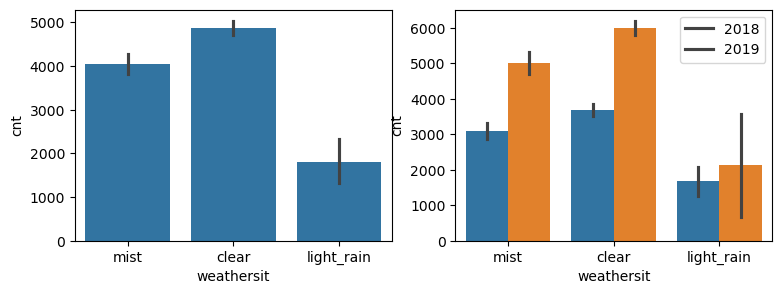

In [28]:
plt.figure(figsize = (9,3))
plt.subplot(1,2,1)
sns.barplot(x='weathersit',y='cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x='weathersit',y='cnt',data=df, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

## Observations
- On Holiday Rent of bike is least
- Most of the Bike has been rented during the weekdays
- Users Rent Bike more when Environment is Clear

## Create Dummy Variables

In [31]:
#create dummy variable 
dataframe1=pd.get_dummies(df,columns=["season","mnth","weekday","weathersit"],drop_first=True,dtype=int)
dataframe1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_rain,weathersit_mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
dataframe1.shape

(730, 30)

## Data Modelling

In [34]:
X=dataframe1.drop(['cnt'],axis=1)
y=dataframe1['cnt']

In [35]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_light_rain', 'weathersit_mist'],
      dtype='object')

In [36]:
# Splitting data into Train-Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)
print(X_train.shape)


(511, 29)


## Scaling

In [38]:
# Scaling data
scaler = MinMaxScaler()

In [39]:
#Create a list of Numerical Variables which need to Scaled
num_cols = ['temp','atemp','hum','windspeed']

In [40]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


In [41]:
# View the Statistical Description to ensure MinMax Scaling has done properly
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_rain,weathersit_mist
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.242661,0.246575,0.248532,...,0.086106,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.029354,0.344423
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.429112,0.431440,0.432585,...,0.280795,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.168963,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_rain,weathersit_mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## RFE(Recursive Feature Elimination)

In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 15),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 12),
 ('weathersit_light_rain', True, 1),
 ('weathersit_mist', True, 1)]

In [46]:
# RFE Selected Features
selected_col = X_train.columns[rfe.support_]
selected_col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_light_rain',
       'weathersit_mist'],
      dtype='object')

In [47]:
X_train = X_train[selected_col]


In [48]:
print(X_train.shape)


(511, 15)


## Building Model



In [50]:
# Adding Constant
X_train_sm=sm.add_constant(X_train)


In [51]:
# Create Object for the Model
linear_ols = sm.OLS(y_train,X_train_sm)
lr_model= linear_ols.fit()

In [52]:
# View Summary of Statistics
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.50e-191
Time:                        22:13:02   Log-Likelihood:                -4114.8
No. Observations:                 511   AIC:                             8262.
Df Residuals:                     495   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2206.7691    314.541      7.016      0.000    1588.770    2824.769
yr                     2007.6643     69.617     28.839      0.000    1870.884    2144.445
holiday                -506.7813    233.946     -2.166      0.031    -966.431     -47.132
workingday              380.7061    100.209      3.799      0.000     183.819     577.594
temp                   4437.9745    298.850     14.850      0.000    3850.804    5025.145
hum                   -1366.6057    324.706     -4.209      0.000   -2004.578    -728.633
windspeed             -1619.1366    221.733     -7.302      0.000   -2054.791   -1183.482
season_spring          -439.3779    179.750     -2.444      0.015    -792.545     -86.211
season_summer           442.3136    129.046      3.428      0.001     188.768     695.859
season_winter           823.3397    150.044      5.487      0.000     528.538    1118.142
mnth_jan               -298.4753    150.964     -1.977      0.049    -595.085      -1.865
mnth_jul               -461.8136    157.127     -2.939      0.003    -770.531    -153.096
mnth_sept               705.8967    143.243      4.928      0.000     424.457     987.336
weekday_sat             466.0363    126.162      3.694      0.000     218.158     713.914
weathersit_light_rain -2154.6073    226.496     -9.513      0.000   -2599.620   -1709.594
weathersit_mist        -492.1456     90.091     -5.463      0.000    -669.154    -315.137
==============================================================================
Omnibus:                       66.238   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.707
Skew:                          -0.677   Prob(JB):                     2.09e-35
Kurtosis:                       5.381   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Calculation of VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif = vif.sort_values(by = "VIF", ascending = False)
vif



,Features,VIF
4,hum,29.394029
3,temp,17.802672
2,workingday,5.318874
5,windspeed,4.734915
6,season_spring,4.531058
8,season_winter,3.475380
7,season_summer,2.849829
14,weathersit_mist,2.287471
0,yr,2.093842
12,weekday_sat,1.975769


In [54]:
X_train=X_train.drop("hum",axis=1)
X_train_sm=sm.add_constant(X_train)

lr_ols = sm.OLS(y_train,X_train_sm)
lr_model= lr_ols.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     190.0
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          6.18e-189
Time:                        22:13:03   Log-Likelihood:                -4123.8
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     496   BIC:                             8341.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1522.3973    273.747      5.561      0.000     984.550    2060.244
yr                     2042.2594     70.285     29.057      0.000    1904.167    2180.352
holiday                -485.9446    237.801     -2.043      0.042    -953.167     -18.722
workingday              407.3465    101.680      4.006      0.000     207.570     607.123
temp                   4111.1718    293.408     14.012      0.000    3534.696    4687.647
windspeed             -1356.7226    216.342     -6.271      0.000   -1781.782    -931.663
season_spring          -517.8708    181.767     -2.849      0.005    -874.999    -160.743
season_summer           387.6602    130.536      2.970      0.003     131.188     644.133
season_winter           693.3129    149.282      4.644      0.000     400.009     986.617
mnth_jan               -339.3758    153.168     -2.216      0.027    -640.315     -38.437
mnth_jul               -417.7679    159.397     -2.621      0.009    -730.945    -104.591
mnth_sept               654.0040    145.096      4.507      0.000     368.926     939.082
weekday_sat             507.6340    127.875      3.970      0.000     256.390     758.878
weathersit_light_rain -2533.7977    211.278    -11.993      0.000   -2948.909   -2118.687
weathersit_mist        -710.4234     74.897     -9.485      0.000    -857.578    -563.269
==============================================================================
Omnibus:                       67.777   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.366
Skew:                          -0.690   Prob(JB):                     2.03e-36
Kurtosis:                       5.411   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.080555
2,workingday,5.255634
4,windspeed,4.682082
5,season_spring,3.074316
6,season_summer,2.340015
0,yr,2.079904
7,season_winter,1.987132
11,weekday_sat,1.968244
8,mnth_jan,1.621722
9,mnth_jul,1.591816


In [56]:
#based on P-value removing holiday
X_train=X_train.drop("holiday",axis=1)
X_train_sm=sm.add_constant(X_train)

lr_ols = sm.OLS(y_train,X_train_sm)
lr_model= lr_ols.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          3.37e-189
Time:                        22:13:03   Log-Likelihood:                -4125.9
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     497   BIC:                             8339.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1453.1682    272.509      5.333      0.000     917.756    1988.581
yr                     2043.8560     70.504     28.989      0.000    1905.332    2182.380
workingday              479.4173     95.672      5.011      0.000     291.447     667.388
temp                   4112.5927    294.343     13.972      0.000    3534.283    4690.903
windspeed             -1365.0636    216.994     -6.291      0.000   -1791.401    -938.726
season_spring          -525.0973    182.312     -2.880      0.004    -883.295    -166.900
season_summer           390.5594    130.945      2.983      0.003     133.285     647.833
season_winter           685.9208    149.715      4.582      0.000     391.769     980.072
mnth_jan               -344.2825    153.638     -2.241      0.025    -646.143     -42.422
mnth_jul               -408.5752    159.842     -2.556      0.011    -722.625     -94.526
mnth_sept               637.4531    145.332      4.386      0.000     351.913     922.993
weekday_sat             580.5418    123.189      4.713      0.000     338.506     822.577
weathersit_light_rain -2523.7360    211.895    -11.910      0.000   -2940.056   -2107.416
weathersit_mist        -705.9669     75.104     -9.400      0.000    -853.528    -558.406
==============================================================================
Omnibus:                       73.749   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.100
Skew:                          -0.733   Prob(JB):                     2.35e-41
Kurtosis:                       5.577   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.825843
1,workingday,4.693461
3,windspeed,4.666642
4,season_spring,2.992418
5,season_summer,2.327283
0,yr,2.079819
6,season_winter,1.922855
10,weekday_sat,1.836796
7,mnth_jan,1.618337
8,mnth_jul,1.591389


In [58]:
X_train=X_train.drop("temp",axis=1)
X_train_sm=sm.add_constant(X_train)

lr_ols = sm.OLS(y_train,X_train_sm)
lr_model= lr_ols.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.5
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.02e-154
Time:                        22:13:03   Log-Likelihood:                -4210.6
No. Observations:                 511   AIC:                             8447.
Df Residuals:                     498   BIC:                             8502.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4680.0825    170.532     27.444      0.000    4345.032    5015.132
yr                     2160.5748     82.538     26.177      0.000    1998.409    2322.740
workingday              493.8573    112.789      4.379      0.000     272.257     715.457
windspeed             -1639.7362    254.780     -6.436      0.000   -2140.311   -1139.161
season_spring         -2269.8285    156.608    -14.494      0.000   -2577.522   -1962.135
season_summer          -368.9690    140.450     -2.627      0.009    -644.917     -93.021
season_winter          -658.8688    135.202     -4.873      0.000    -924.505    -393.232
mnth_jan               -896.7195    175.036     -5.123      0.000   -1240.619    -552.820
mnth_jul                -74.6798    186.333     -0.401      0.689    -440.775     291.416
mnth_sept               598.2408    171.312      3.492      0.001     261.658     934.824
weekday_sat             563.9446    145.231      3.883      0.000     278.604     849.285
weathersit_light_rain -2634.2148    249.646    -10.552      0.000   -3124.704   -2143.725
weathersit_mist        -766.6459     88.398     -8.673      0.000    -940.325    -592.966
==============================================================================
Omnibus:                       39.558   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.039
Skew:                          -0.460   Prob(JB):                     4.17e-18
Kurtosis:                       4.707   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.215497
1,workingday,3.551736
3,season_spring,2.916576
4,season_summer,2.261678
5,season_winter,1.922706
0,yr,1.912761
9,weekday_sat,1.618358
6,mnth_jan,1.596931
11,weathersit_mist,1.565790
7,mnth_jul,1.290767


In [60]:

X_train=X_train.drop("mnth_jul",axis=1)
X_train_sm=sm.add_constant(X_train)

lr_ols = sm.OLS(y_train,X_train_sm)
lr_model= lr_ols.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     160.1
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          8.52e-156
Time:                        22:13:03   Log-Likelihood:                -4210.7
No. Observations:                 511   AIC:                             8445.
Df Residuals:                     499   BIC:                             8496.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4651.2646    154.501     30.105      0.000    4347.711    4954.818
yr                     2160.8331     82.466     26.203      0.000    1998.810    2322.857
workingday              495.2774    112.638      4.397      0.000     273.974     716.581
windspeed             -1639.0134    254.559     -6.439      0.000   -2139.153   -1138.874
season_spring         -2243.1276    141.612    -15.840      0.000   -2521.356   -1964.899
season_summer          -342.5223    123.879     -2.765      0.006    -585.912     -99.133
season_winter          -633.6558    119.574     -5.299      0.000    -868.586    -398.725
mnth_jan               -897.0311    174.887     -5.129      0.000   -1240.636    -553.426
mnth_sept               619.1925    163.003      3.799      0.000     298.935     939.450
weekday_sat             564.5428    145.101      3.891      0.000     279.458     849.627
weathersit_light_rain -2635.2426    249.423    -10.565      0.000   -3125.291   -2145.194
weathersit_mist        -764.2917     88.129     -8.672      0.000    -937.441    -591.143
==============================================================================
Omnibus:                       39.640   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.800
Skew:                          -0.462   Prob(JB):                     4.70e-18
Kurtosis:                       4.701   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.046929
1,workingday,3.300849
3,season_spring,2.648293
4,season_summer,1.998066
0,yr,1.886478
5,season_winter,1.734230
6,mnth_jan,1.596356
10,weathersit_mist,1.565600
8,weekday_sat,1.558538
7,mnth_sept,1.180731


## Residual Analysis

In [63]:
y_train_pred = lr_model.predict(X_train_sm)


Text(0.5, 0.98, 'Distribution of Error Terms')

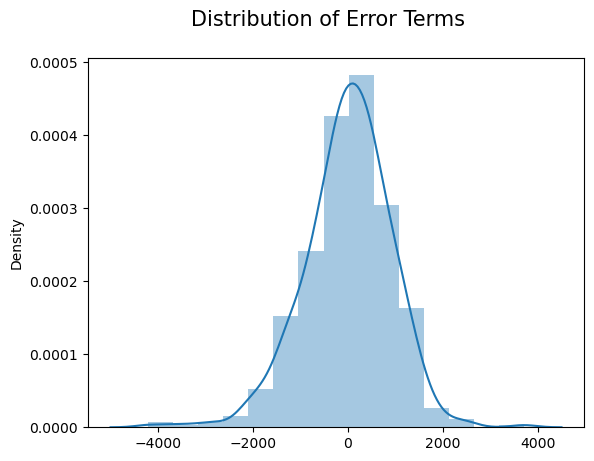

In [64]:
fig = plt.figure()
sns.distplot(y_train - y_train_pred, bins = 15)
fig.suptitle('Distribution of Error Terms', fontsize = 15)  

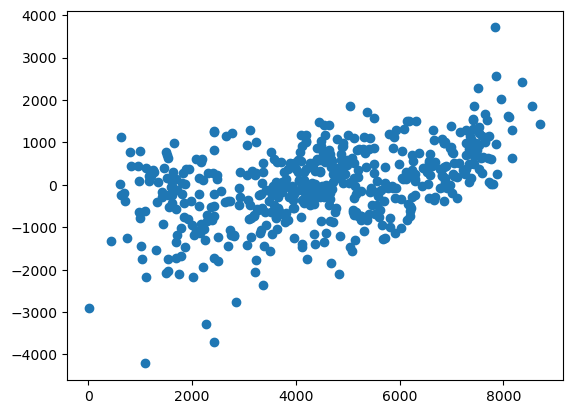

In [65]:
plt.scatter(y_train,y_train - y_train_pred)
plt.show()

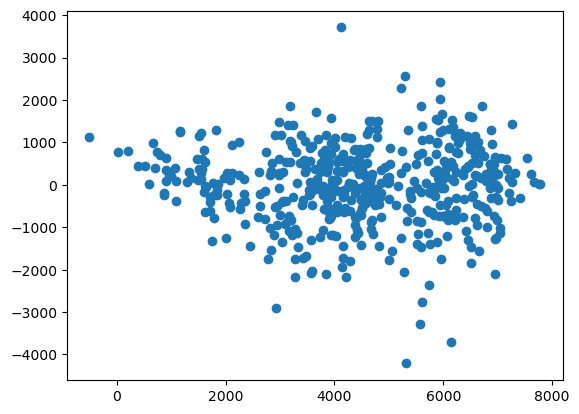

In [66]:
plt.scatter(y_train_pred,y_train - y_train_pred)
plt.show()

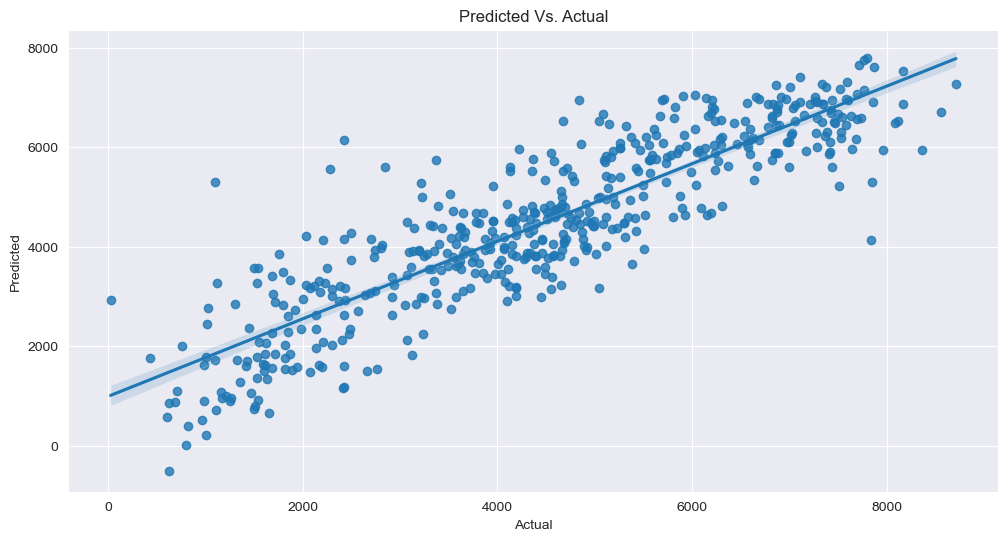

In [67]:
#check for constant variance
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Vs. Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Model Evaluation on Test Dataset

In [69]:
num_cols = ['temp','atemp','hum','windspeed']
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [70]:

X_test= X_test[selected_col]
print(X_train.shape)

(511, 11)


In [71]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_jan,mnth_jul,mnth_sept,weekday_sat,weathersit_light_rain,weathersit_mist
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,1,0,0,0,1
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,0


In [72]:
#Dropping the cols which were eliminated during the Training Process
X_test_sm = X_test_sm.drop(['hum', 'holiday', 'temp', 'mnth_jul'],axis=1)

In [73]:
# Predict the Price for Test Data using the Trainned Model
y_test_pred = lr_model.predict(X_test_sm)
#y_test_pred.sample(5)

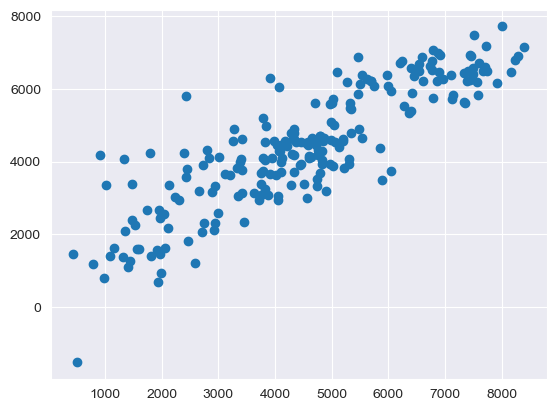

In [74]:
plt.scatter(y_test,y_test_pred)
plt.show()

## R-Square

In [76]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train:",round(r2_train,3),"Test:",round(r2_test,3))

Train: 0.779 Test: 0.741


## The Final Model accuray is around 75%.